In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.4.0'

In [4]:
tf.__version__

'2.4.1'

Dataset of 60000 28X28 grayscale image of 10 fashion categories, along with a set of 10000 images. The class labels are:
### 0 Tshirt/top
### 1 Trouser
### 2 Pullover 
### 3 Dress
### 4 Coat
### 5 Sandal
### 6 Shirt
### 7 Sneaker
### 8 Bag
### 9 Ankle boot

In [5]:
from keras.datasets import fashion_mnist

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

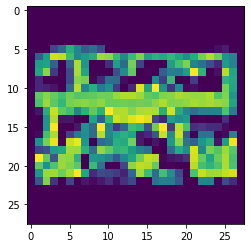

In [60]:
plt.imshow(X_train_full[10000])

In [8]:
y_train_full[1]

0

In [9]:
class_names=["T_shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [61]:
class_names[y_train_full[10000]]

'Bag'

In [63]:
# X_train_full[1]

# Data Normalization

### We then normalize the data dimensions so that they are of approximately the same scale

In [12]:
X_train_n = X_train_full/255.0
X_test_n = X_test/255.0

# Split the data into train/validation/test/dataset

In the earlier step of importing the date. We had 60,000 datasets for training and 10,000 for testing data. Now further spit into train/validation. Here is how each type of data set is used in deep learning:

#### Training data - used for training the model 
#### Validation data - used for tuning the hyperparameters and evaluate the model
#### Test data - used to test the model after the model has gone through initial vetting by validation set


In [65]:
X_valid,X_train = X_train_n[:5000],X_train_n[5000:]
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test_n

In [106]:
X_train.shape

(55000, 28, 28)

In [107]:
X_valid.shape

(5000, 28, 28)

In [67]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# 2  different ways to create ANN

## Two APIs for defining model in keras

### Sequential API

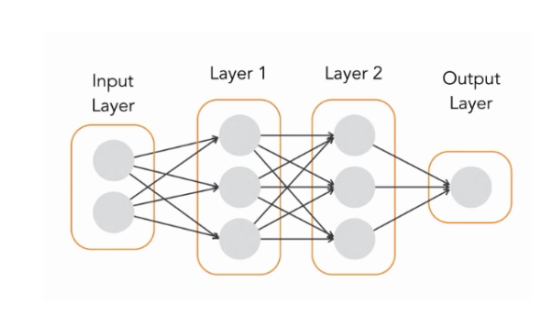

### Functional API

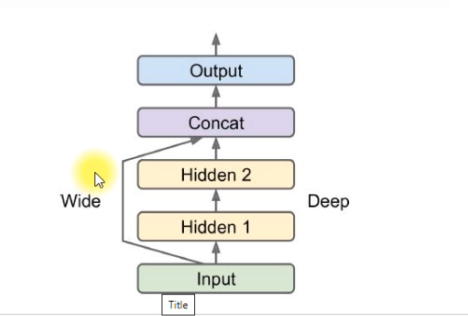

In [68]:
np.random.seed(42)
tf.random.set_seed(42)

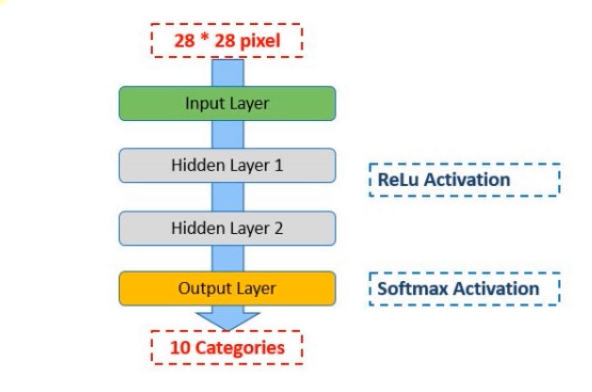

In [69]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


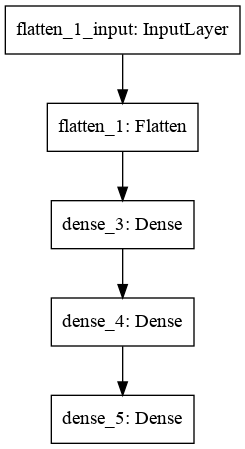

In [71]:
import pydot
keras.utils.plot_model(model)

#### We can access the  parameters using get_weight() method 

In [72]:
weights, biases = model.layers[1].get_weights()

In [73]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [74]:
weights.shape

(784, 300)

In [75]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [76]:
biases.shape

(300,)

https://keras.rstudio.com/articles/sequential_model.html

In [95]:
# sgd = keras.optimizers.SGD(lr=0.01, clipnorm=1.)
# sgd = keras.optimizers.SGD(lr=0.01, clipvalue=0.5)
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [96]:
tf.keras.optimizers

<module 'tensorflow.keras.optimizers' from '/home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/keras/optimizers/__init__.py'>

In [113]:
X_valid.shape

(5000, 28, 28)

In [98]:
model_history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2871 - accuracy: 0.8976 - val_loss: 0.3178 - val_accuracy: 0.8848
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2801 - accuracy: 0.8979 - val_loss: 0.3140 - val_accuracy: 0.8900
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2736 - accuracy: 0.9015 - val_loss: 0.4454 - val_accuracy: 0.8434
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2673 - accuracy: 0.9047 - val_loss: 0.3135 - val_accuracy: 0.8862
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2667 - accuracy: 0.9031 - val_loss: 0.2996 - val_accuracy: 0.8918
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2496 - accuracy: 0.9097 - val_loss: 0.3189 - val_accuracy: 0.8872
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2479 - accuracy: 0.9121 - val_loss: 0.3021 - val_accu

In [103]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [109]:
model_history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [104]:
model_history.history

{'loss': [0.2877500057220459,
  0.28000321984291077,
  0.2719694674015045,
  0.26651373505592346,
  0.2623772621154785,
  0.2535415589809418,
  0.2495643049478531,
  0.24476824700832367,
  0.2392171174287796,
  0.23592811822891235,
  0.23197390139102936,
  0.2260664701461792,
  0.22242261469364166,
  0.21974340081214905,
  0.2141169011592865,
  0.21179617941379547,
  0.20781856775283813,
  0.2039913684129715,
  0.20117893815040588,
  0.19678819179534912,
  0.1938037872314453,
  0.1904926598072052,
  0.18744716048240662,
  0.18360261619091034,
  0.180225670337677,
  0.17768257856369019,
  0.17532950639724731,
  0.17320971190929413,
  0.16896562278270721,
  0.16714966297149658],
 'accuracy': [0.8969454765319824,
  0.8991636633872986,
  0.9021454453468323,
  0.9049272537231445,
  0.9057454466819763,
  0.909072756767273,
  0.9111999869346619,
  0.9129636287689209,
  0.914581835269928,
  0.9152727127075195,
  0.9165090918540955,
  0.9193817973136902,
  0.9206363558769226,
  0.92116361856460

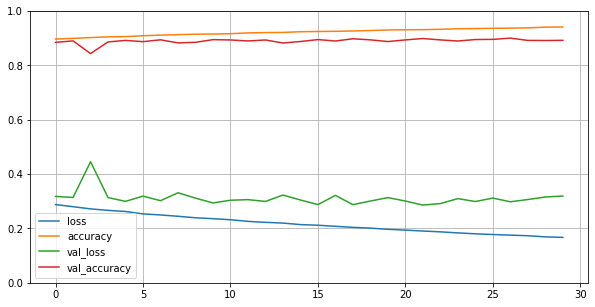

In [105]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [114]:
 model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3504 - accuracy: 0.8848


[0.3503996729850769, 0.8848000168800354]

In [115]:
X_new = X_test[:3]

In [116]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.9 , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [117]:
y_pred = model.predict_classes(X_new)
y_pred

/home/sahil/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [118]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


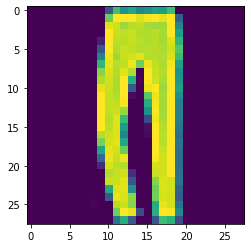

In [123]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


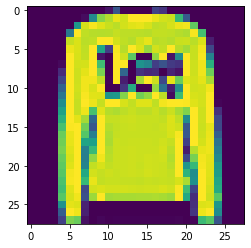

In [124]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


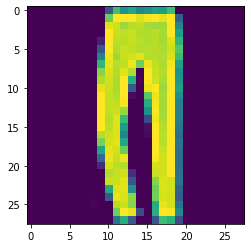

In [125]:
print(plt.imshow(X_test[2]))